In [1]:
import pandas as pd
import numpy as np
import requests
import time
import json
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Gather

In [2]:
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [4]:
# Download the image predictions tweet using request.get method
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))

In [5]:
# write content of response in image-predictions.tsv
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

# load image_predictions.tsv into a dataframe    
image_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
image_df.head(5)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [14]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424


Rate limit reached. Sleeping for: 257


Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
1563: 688211956440801280
Success
1564: 688179443353796608
Success
1565: 688116655151435777
Success
1566: 688064179421470721
Success
1567: 687841446767013888
Success
1568: 687826841265172480
Success
1569: 687818504314159109
Success
1570: 687807801670897665
Success
1571: 687732144991551489
Success
1572: 687704180304273409
Success
1573: 687664829264453632
Success
1574: 687494652870668288
Success
1575: 687480748861947905
Success
1576: 687476254459715584
Success
1577: 687460506001633280
Success
1578: 687399393394311168
Success
1579: 687317306314240000
Success
1580: 687312378585812992
Success
1581: 687127927494963200
Success
1582: 687124485711986689
Success
1583: 687109925361856513
Success
15

Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
18

Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
2081: 670823764196741120
Success
20

Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
23

In [15]:
# read the gathered tweets in tweet_json.txt line by line into a file
tweet_json = []

with open('tweet_json.txt') as json_file:
    for line in json_file:
        tweet_content = json.loads(line)
        
        tweet_json.append({'tweet_id': tweet_content['id'], 
                      'retweet_count': tweet_content['retweet_count'], 
                      'favorite_count': tweet_content['favorite_count'],
                      'tweet_created': tweet_content['created_at']})
        
    
# store read content into a dataframe
tweet_df = pd.DataFrame(tweet_json)

In [16]:
tweet_df.head()

tweet_id  retweet_count  favorite_count  \
0  892420643555336193           6953           33634   
1  892177421306343426           5259           29170   
2  891815181378084864           3462           21946   
3  891689557279858688           7172           36713   
4  891327558926688256           7704           35112   

                    tweet_created  
0  Tue Aug 01 16:23:56 +0000 2017  
1  Tue Aug 01 00:17:27 +0000 2017  
2  Mon Jul 31 00:18:03 +0000 2017  
3  Sun Jul 30 15:58:51 +0000 2017  
4  Sat Jul 29 16:00:24 +0000 2017

In [17]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2326 non-null   int64 
 1   retweet_count   2326 non-null   int64 
 2   favorite_count  2326 non-null   int64 
 3   tweet_created   2326 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


## Assess

In [18]:
twitter_archive.sample(20) 

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
559   803276597545603072                    NaN                  NaN   
1345  704491224099647488           7.044857e+17           28785486.0   
2081  670822709593571328                    NaN                  NaN   
626   795076730285391872                    NaN                  NaN   
2000  672488522314567680                    NaN                  NaN   
1991  672622327801233409                    NaN                  NaN   
729   781955203444699136                    NaN                  NaN   
376   828046555563323392                    NaN                  NaN   
193   855459453768019968                    NaN                  NaN   
359   829878982036299777                    NaN                  NaN   
1967  673342308415348736                    NaN                  NaN   
1680  682003177596559360                    NaN                  NaN   
431   820837357901512704                    NaN                  NaN   
2250  667832474953625600                    NaN                  NaN   
782   775364825476165632                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
322   834167344700198914                    NaN                  NaN   
1172  720389942216527872                    NaN                  NaN   
1175  720043174954147842                    NaN                  NaN   
667   790337589677002753                    NaN                  NaN   

                      timestamp  \
559   2016-11-28 16:37:19 +0000   
1345  2016-03-01 02:19:31 +0000   
2081  2015-11-29 04:32:51 +0000   
626   2016-11-06 01:33:58 +0000   
2000  2015-12-03 18:52:12 +0000   
1991  2015-12-04 03:43:54 +0000   
729   2016-09-30 20:33:43 +0000   
376   2017-02-05 01:04:17 +0000   
193   2017-04-21 16:33:22 +0000   
359   2017-02-10 02:25:42 +0000   
1967  2015-12-06 03:24:51 +0000   
1680  2015-12-30 01:00:03 +0000   
431   2017-01-16 03:37:31 +0000   
2250  2015-11-20 22:30:44 +0000   
782   2016-09-12 16:05:54 +0000   
17    2017-07-22 16:56:37 +0000   
322   2017-02-21 22:26:07 +0000   
1172  2016-04-13 23:15:21 +0000   
1175  2016-04-13 00:17:25 +0000   
667   2016-10-23 23:42:19 +0000   

                                                 source  \
559   <a href="http://twitter.com/download/iphone" r...   
1345  <a href="http://twitter.com/download/iphone" r...   
2081  <a href="http://twitter.com/download/iphone" r...   
626   <a href="http://twitter.com/download/iphone" r...   
2000  <a href="http://twitter.com/download/iphone" r...   
1991  <a href="http://twitter.com/download/iphone" r...   
729   <a href="http://twitter.com/download/iphone" r...   
376   <a href="http://twitter.com/download/iphone" r...   
193   <a href="http://twitter.com/download/iphone" r...   
359   <a href="http://twitter.com/download/iphone" r...   
1967  <a href="http://twitter.com/download/iphone" r...   
1680  <a href="http://twitter.com/download/iphone" r...   
431   <a href="http://twitter.com/download/iphone" r...   
2250  <a href="http://twitter.com/download/iphone" r...   
782   <a href="http://twitter.com/download/iphone" r...   
17    <a href="http://twitter.com/download/iphone" r...   
322   <a href="http://twitter.com/download/iphone" r...   
1172  <a href="http://twitter.com/download/iphone" r...   
1175  <a href="http://twitter.com/download/iphone" r...   
667   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
559   This is Winston. His selfie game is legendary....                  NaN   
1345                                13/10 hero af\n@ABC                  NaN   
2081  Can't do better than this lol. 10/10 for the o...                  NaN   
626   This is Bailey. She loves going down slides bu...                  NaN   
2000  This is Jackie. She was all ready to go out, b...                  NaN   
1991  This lil pupper is sad because we haven't

In [19]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [21]:
image_df.sample(20)

tweet_id                                          jpg_url  \
450   674739953134403584  https://pbs.twimg.com/media/CV0oaHFW4AA9Coi.jpg   
882   698710712454139905  https://pbs.twimg.com/media/CbJRrigW0AIcJ2N.jpg   
763   688908934925697024  https://pbs.twimg.com/media/CY9_BOYWkAAkuzn.jpg   
1522  788070120937619456  https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg   
1410  770655142660169732  https://pbs.twimg.com/media/CrHqwjWXgAAgJSe.jpg   
1430  773191612633579521  https://pbs.twimg.com/media/CrrtqjdXEAINleR.jpg   
805   691756958957883396  https://pbs.twimg.com/media/CZmdSD8UcAAnY5R.jpg   
840   694669722378485760  https://pbs.twimg.com/media/CaP2bS8WYAAsMdx.jpg   
863   697259378236399616  https://pbs.twimg.com/media/Ca0ps3AXEAAnp9m.jpg   
516   676430933382295552  https://pbs.twimg.com/media/CWMqV7WUYAEEClG.jpg   
929   702932127499816960  https://pbs.twimg.com/media/CcFRCfRW4AA5a72.jpg   
276   670840546554966016  https://pbs.twimg.com/media/CU9N6upXAAAbtQe.jpg   
502   675870721063669760  https://pbs.twimg.com/media/CWEs1b-WEAEhq82.jpg   
1272  750011400160841729  https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg   
413   673956914389192708  https://pbs.twimg.com/media/CVpgPGwWoAEV7gG.jpg   
1818  834167344700198914  https://pbs.twimg.com/media/C5OOxY6WAAAxERz.jpg   
1074  717009362452090881  https://pbs.twimg.com/media/CfNUNetW8AAekHx.jpg   
1104  722613351520608256  https://pbs.twimg.com/media/Cgc9AjMVIAERdUA.jpg   
1530  789530877013393408  https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg   
713   685325112850124800  https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg   

      img_num                  p1   p1_conf  p1_dog                      p2  \
450         1      Dandie_Dinmont  0.175915    True     black-footed_ferret   
882         1             Samoyed  0.329895    True                   shoji   
763         1               crane  0.158859   False                    pier   
1522        1    golden_retriever  0.735163    True          Sussex_spaniel   
1410        1      Madagascar_cat  0.494803   False                   skunk   
1430        1    Blenheim_spaniel  0.427766    True                Shih-Tzu   
805         1       Saint_Bernard  0.342571    True                   boxer   
840         2              beaver  0.457094   False                mongoose   
863         1          Great_Dane  0.999223    True                   boxer   
516         1    golden_retriever  0.583875    True          cocker_spaniel   
929         1             wallaby  0.410710   False                  wombat   
276         1            Shih-Tzu  0.963622    True                   Lhasa   
502         1    golden_retriever  0.263892    True  Welsh_springer_spaniel   
1272        1              muzzle  0.237620   False             Boston_bull   
413         1                 pug  0.586161    True       Brabancon_griffon   
1818        1                  ox  0.991682   False                   bison   
1074        1      Siberian_husky  0.506154    True              Eskimo_dog   
1104        1  Labrador_retriever  0.530915    True        golden_retriever   
1530        3          schipperke  0.363272    True                  kelpie   
713         1    golden_retriever  0.586937    True      Labrador_retriever   

       p2_conf  p2_dog                      p3   p3_conf  p3_dog  
450   0.096534   False              toy_poodle  0.064145    True  
882   0.165772   False                  prison  0.103596   False  
763   0.130016   False               bell_cote  0.087741   False  
1522  0.064897    True      Labrador_retriever  0.047704    True  
1410  0.161184   False             paper_towel  0.091572   False  
1430  0.219256    True  Welsh_springer_spaniel  0.144614    True  
805   0.289096    True                Pembroke  0.076463    True  
840   0.228298   False                  marmot  0.148309   False  
863   0.000187    True                 whippet  0.000151    True  
516   0.203671    True      Labrador_retriever  0.036122    True  
9

In [22]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
tweet_df.sample(10)

tweet_id  retweet_count  favorite_count  \
283   836753516572119041           4242           18046   
2121  669682095984410625            115             310   
17    888804989199671297           3506           22349   
1333  703041949650034688          11263           24252   
1656  681654059175129088            817            2408   
1109  728035342121635841           1500            4140   
1236  709901256215666688             92             604   
182   855818117272018944           4789           24182   
1379  699072405256409088           1072            2702   
1614  683857920510050305           1013            3497   

                       tweet_created  
283   Wed Mar 01 01:42:39 +0000 2017  
2121  Thu Nov 26 01:00:28 +0000 2015  
17    Sat Jul 22 16:56:37 +0000 2017  
1333  Fri Feb 26 02:20:37 +0000 2016  
1656  Tue Dec 29 01:52:46 +0000 2015  
1109  Thu May 05 01:35:26 +0000 2016  
1236  Wed Mar 16 00:37:03 +0000 2016  
182   Sat Apr 22 16:18:34 +0000 2017  
1379  Mon Feb 15 03:27:04 +0000 2016  
1614  Mon Jan 04 03:50:08 +0000 2016

In [24]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2326 non-null   int64 
 1   retweet_count   2326 non-null   int64 
 2   favorite_count  2326 non-null   int64 
 3   tweet_created   2326 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


### Quality
#### Twitter archive table
 1. Erroneous datatype(in_reply_to_user_id, in_reply_to_status_id, timestamp, rating_numerator, rating_denominator).
 2. Retain original ratings(no retweet) that have images.
 3. Remove columns not needed for analysis. 
 4. Some rating_numerator and rating_denominator values are invalid
 
#### Image prediction table
 5. Some records has no image.
 6. Multi name dog breed are separated with an underscore instead of spaces.
 7. Non-uniform case in p names(some names begin with upper case others in lower case). 
 
#### Tweets table
 8. Erroneous datatype(tweet_created).

### Tidiness
 1. Four variables in Four columns(doggo, floofer, pupper, puppo)
 2. Tweet and image predictions tables should be merge with twitter archive table

## Clean

In [25]:
# copy the dataframes to preserve their original contents
twitter_archive_clean = twitter_archive.copy()
image_clean = image_df.copy()
tweet_clean = tweet_df.copy()

### *Tidiness Issues*
#### T1. Four variables in Four columns(doggo, floofer, pupper, puppo)
#### *Define*
*Combine doggo, floofer, pupper and puppo columns into one column name dog_stage by extracting the dog stages from the text column. Also eliminate the error in giving a dog multiple dog stages(e.g floofer and pupper)*

#### *Code* 

In [26]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')
# replace the NaN values in dog stage column with None value
twitter_archive_clean['dog_stage'] = twitter_archive_clean.dog_stage.replace({np.nan:None})

# drop the four columns that has headers for the dog stages
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### *Test*



In [27]:
twitter_archive_clean.sample(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2007  672264251789176834                    NaN                  NaN   
2254  667782464991965184                    NaN                  NaN   
190   855857698524602368                    NaN                  NaN   
332   832769181346996225                    NaN                  NaN   
1977  672988786805112832                    NaN                  NaN   
2079  670826280409919488                    NaN                  NaN   
208   852311364735569921                    NaN                  NaN   
1681  681981167097122816                    NaN                  NaN   
689   787717603741622272                    NaN                  NaN   
384   826958653328592898                    NaN                  NaN   
1448  696405997980676096                    NaN                  NaN   
609   797545162159308800                    NaN                  NaN   
1666  682697186228989953                    NaN                  NaN   
1943  673709992831262724                    NaN                  NaN   
1423  697995514407682048                    NaN                  NaN   
904   758355060040593408                    NaN                  NaN   
1010  747461612269887489                    NaN                  NaN   
1964  673350198937153538                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
129   867421006826221569                    NaN                  NaN   

                      timestamp  \
2007  2015-12-03 04:01:02 +0000   
2254  2015-11-20 19:12:01 +0000   
190   2017-04-22 18:55:51 +0000   
332   2017-02-18 01:50:19 +0000   
1977  2015-12-05 04:00:04 +0000   
2079  2015-11-29 04:47:03 +0000   
208   2017-04-13 00:03:59 +0000   
1681  2015-12-29 23:32:35 +0000   
689   2016-10-16 18:11:26 +0000   
384   2017-02-02 01:01:21 +0000   
1448  2016-02-07 18:51:43 +0000   
609   2016-11-12 21:02:38 +0000   
1666  2015-12-31 22:57:47 +0000   
1943  2015-12-07 03:45:53 +0000   
1423  2016-02-12 04:07:53 +0000   
904   2016-07-27 17:35:10 +0000   
1010  2016-06-27 16:08:30 +0000   
1964  2015-12-06 03:56:12 +0000   
2336  2015-11-16 15:14:19 +0000   
129   2017-05-24 16:44:18 +0000   

                                                 source  \
2007  <a href="http://twitter.com/download/iphone" r...   
2254  <a href="http://twitter.com/download/iphone" r...   
190   <a href="http://twitter.com/download/iphone" r...   
332   <a href="http://twitter.com/download/iphone" r...   
1977  <a href="http://twitter.com/download/iphone" r...   
2079  <a href="http://twitter.com/download/iphone" r...   
208   <a href="http://twitter.com/download/iphone" r...   
1681  <a href="http://twitter.com/download/iphone" r...   
689   <a href="http://twitter.com/download/iphone" r...   
384   <a href="http://twitter.com/download/iphone" r...   
1448  <a href="http://twitter.com/download/iphone" r...   
609   <a href="http://twitter.com/download/iphone" r...   
1666  <a href="http://twitter.com/download/iphone" r...   
1943  <a href="http://twitter.com/download/iphone" r...   
1423  <a href="http://twitter.com/download/iphone" r...   
904   <a href="http://twitter.com/download/iphone" r...   
1010  <a href="http://twitter.com/download/iphone" r...   
1964  <a href="http://twitter.com/download/iphone" r...   
2336  <a href="http://twitter.com/download/iphone" r...   
129   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2007  This is Kreg. He has the eyes of a tyrannical ...                  NaN   
2254  Super rare dog. Endangered (?). Thinks it's fu...                  NaN   
190   HE'S LIKE "WAIT A MINUTE I'M AN ANIMAL THIS IS...                  NaN   
332   RT @EmilieGambril: 12/10 h*cking excited about...         8.327664e+17   
1977  This is Schnozz. He's had a blurred tail since...                  NaN   
2079  Scary dog here. Too many legs. Extra tail

In [28]:
twitter_archive_clean.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

#### T2. Tweet and image predictions tables should be merge with twitter archive table
#### *Define*
*Merge the tweet and image prediction tables to the twitter archive table*

#### *Code* 

In [29]:
# Merge twitter archive column with the image predictions column
twitter_archive_clean = pd.merge(twitter_archive_clean, image_clean, on='tweet_id', how='inner')

# Merge the result of the above to the tweet column
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_clean, on='tweet_id', how='inner')

#### *Test* 

In [30]:
twitter_archive_clean.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   

                                       expanded_urls  ...  p1_dog     p2  \
0  https://twitter.com/dog_rates/status/892420643...  ...   False  bagel   

    p2_conf p2_dog      p3  p3_conf p3_dog  retweet_count  favorite_count  \
0  0.085851  False  banana  0.07611  False           6953           33634   

                    tweet_created  
0  Tue Aug 01 16:23:56 +0000 2017  

[1 rows x 28 columns]

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2056 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2056 non-null   object 
 4   source                      2056 non-null   object 
 5   text                        2056 non-null   object 
 6   retweeted_status_id         70 non-null     float64
 7   retweeted_status_user_id    70 non-null     float64
 8   retweeted_status_timestamp  70 non-null     object 
 9   expanded_urls               2056 non-null   object 
 10  rating_numerator            2056 non-null   int64  
 11  rating_denominator          2056 non-null   int64  
 12  name                        2056 non-null   object 
 13  dog_stage                   333 n

### Q1. Erroneous datatype(timestamp, tweet_created)
#### *Define*
*Convert erroneous datatype in twitter_archive_clean dataframe and tweet_clean dataframe*

#### *Code* 

In [32]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### *Test* 

In [33]:
twitter_archive_clean.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
dog_stage                                  object
jpg_url                                    object
img_num                                     int64
p1                                         object
p1_conf                                   float64
p1_dog                                       bool
p2                                         object


In [34]:
tweet_clean.dtypes

tweet_id           int64
retweet_count      int64
favorite_count     int64
tweet_created     object
dtype: object

#### Q2. Retain original ratings(no retweet) that have images.
#### *Define*
*Keep original ratings(no retweet) that have images by filtering out retweets with images*

#### *Code*

In [35]:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

#### *Test* 

In [36]:
twitter_archive_clean.retweeted_status_user_id.value_counts().sum()

0

#### Q3. Remove columns not needed for analysis.
#### *Define*
*Drop columns() not needed for analysis in twitter_archive_clean table()*

#### *Code* 

In [37]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis = 1)

#### *Test* 

#### Q4. Some rating_numerator and rating_denominator have invalid values
#### *Define*
*Extract the correct ratings from the text and separate the numerators and denominators into respective columns*

#### *Code* 

In [38]:
twitter_archive_clean['ratings'] = twitter_archive_clean['text'].str.extract('(\d+.*\/\d+?\s)')

In [39]:
numbers = twitter_archive_clean['ratings'].str.split("/", n=1, expand=True)

twitter_archive_clean['rating_numerator'] = numbers[0]
twitter_archive_clean['rating_denominator'] = numbers[1]


In [40]:
# Drop ratings column after extraction
twitter_archive_clean = twitter_archive_clean.drop(['ratings'], axis=1)


#### *Test* 

In [41]:
twitter_archive_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...               13   
1  This is Tilly. She's just checking pup on you....               13   
2  This is Archie. He is a rare Norwegian Pouncin...               12   
3  This is Darla. She commenced a snooze mid meal...               13   
4  This is Franklin. He would like you to stop ca...               12   

  rating_denominator      name dog_stage  \
0                10    Phineas      None   
1                10      Tilly      None   
2                10     Archie      None   
3                10      Darla      None   
4                10   Franklin      None   

                                           jpg_url  img_num  ... p1_dog  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1  ...  False   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1  ...   True   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1  ...   True   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1  ...  False   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2  ...   True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               bagel  0.085851  False                       banana  0.076110   
1            Pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  Labrador_retriever  0.168086   True                      spatula  0.040836   
4    English_springer  0.225770   True  German_short-haired_pointer  0.175219   

  p3_dog  retweet_count  favorite_count                   tweet_created  
0  False           6953           33634  Tue Aug 01 16:23:56 +0000 2017  
1   True           5259           29170  Tue Aug 01 00:17:27 +0000 2017  
2   True           3462           21946  Mon Jul 31 00:18:03 +0000 2017  
3  False           7172           36713  Sun Jul 30 15:58:51 +0000 2017  
4   True           7704           35112  Sat Jul 29 16:00:24 +0000 2017  

[5 rows x 22 columns]

In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2055
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   int64              
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   rating_numerator    1949 non-null   object             
 5   rating_denominator  1949 non-null   object             
 6   name                1986 non-null   object             
 7   dog_stage           324 non-null    object             
 8   jpg_url             1986 non-null   object             
 9   img_num             1986 non-null   int64              
 10  p1                  1986 non-null   object             
 11  p1_conf             1986 non-null   float64            
 12  p1_dog              1986 non-null 


#### Q5. Some records have no images 
#### *Define*
*Delete missing records with no images*  

#### *Code* 

In [43]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.jpg_url.notnull()]

#### *Test* 

In [44]:
sum(twitter_archive_clean.jpg_url.isnull())

0

In [45]:
twitter_archive_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                   object
rating_denominator                 object
name                               object
dog_stage                          object
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
retweet_count                       int64
favorite_count                      int64
tweet_created                      object
dtype: object

#### Q6. Multi name dog breed are separated with underscores and hyphens instead of spaces.
#### *Define*
*Replace multi name separator with space using the str.replace method*

#### *Code* 

In [46]:
twitter_archive_clean['p1'] = twitter_archive_clean['p1'].str.replace('_', ' ')
twitter_archive_clean['p1'] = twitter_archive_clean['p1'].str.replace('-', ' ')
twitter_archive_clean['p2'] = twitter_archive_clean['p2'].str.replace('_', ' ')
twitter_archive_clean['p2'] = twitter_archive_clean['p2'].str.replace('-', ' ')
twitter_archive_clean['p3'] = twitter_archive_clean['p3'].str.replace('_', ' ')
twitter_archive_clean['p3'] = twitter_archive_clean['p3'].str.replace('-', ' ')

#### *Test* 

In [47]:
image_clean.sample(10)

tweet_id                                          jpg_url  \
854   696488710901260288  https://pbs.twimg.com/media/CapsyfkWcAQ41uC.jpg   
1356  760539183865880579  https://pbs.twimg.com/media/Co36VZfWcAEN3R3.jpg   
67    667177989038297088  https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg   
1484  781524693396357120  https://pbs.twimg.com/media/CtiIj0AWcAEBDvw.jpg   
1856  841439858740625411  https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg   
1295  751937170840121344  https://pbs.twimg.com/media/Cm9q2d3XEAAqO2m.jpg   
1645  808134635716833280  https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg   
1588  798340744599797760  https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg   
494   675710890956750848  https://pbs.twimg.com/media/CWCbd8ZWoAAtqoH.jpg   
793   690735892932222976  https://pbs.twimg.com/media/CZX8nyeVAAEstKM.jpg   

      img_num                  p1   p1_conf  p1_dog                        p2  \
854         1              briard  0.369063    True            Scotch_terrier   
1356        1             Samoyed  0.988013    True                  malamute   
67          1              vizsla  0.259249    True  Chesapeake_Bay_retriever   
1484        1         tennis_ball  0.994712   False  Chesapeake_Bay_retriever   
1856        3    military_uniform  0.853684   False        Labrador_retriever   
1295        1    Lakeland_terrier  0.424168    True                     teddy   
1645        1      cocker_spaniel  0.740220    True            Dandie_Dinmont   
1588        1            papillon  0.533180    True                    collie   
494         2  standard_schnauzer  0.441427    True       miniature_schnauzer   
793         1    golden_retriever  0.883229    True        Labrador_retriever   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
854   0.168204    True              giant_schnauzer  0.120553    True  
1356  0.004518    True  West_Highland_white_terrier  0.001189    True  
67    0.176293    True                   Weimaraner  0.112369    True  
1484  0.003523    True           Labrador_retriever  0.000921    True  
1856  0.048200    True                  groenendael  0.015394    True  
1295  0.260562   False             golden_retriever  0.127432    True  
1645  0.061604    True               English_setter  0.041331    True  
1588  0.192031    True                Border_collie  0.121626    True  
494   0.248885    True             Sealyham_terrier  0.164967    True  
793   0.109635    True                       kuvasz  0.002795    True

#### Q7. Non-uniform case in p names(some names begin with upper case others in lower case).
#### *Define*
*Convert names that begins with lowercase to uppercase*

#### *Code* 

In [48]:
twitter_archive_clean['p1'] = twitter_archive_clean['p1'].apply(lambda x: x.title())
twitter_archive_clean['p2'] = twitter_archive_clean['p2'].apply(lambda x: x.title())
twitter_archive_clean['p3'] = twitter_archive_clean['p3'].apply(lambda x: x.title())

#### *Test* 

In [49]:
sum(twitter_archive_clean.p1.str.islower())

0

#### Q8. Erroneous datatype (tweet_created, rating_numerator, rating_denominator, dog_stage).
#### *Define*
*Correct the datatypes of columns: tweet_created, rating_numerator, rating_denominator, dog_stage*

#### *Code* 

In [50]:
twitter_archive_clean['tweet_created'] = pd.to_datetime(twitter_archive_clean['tweet_created'])
twitter_archive_clean['rating_numerator'] = pd.to_numeric(twitter_archive_clean['rating_numerator'],errors='coerce')
twitter_archive_clean['rating_denominator'] = pd.to_numeric(twitter_archive_clean['rating_denominator'],errors='coerce')
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')

#### *Test* 

In [51]:
twitter_archive_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                  float64
rating_denominator                float64
name                               object
dog_stage                        category
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
retweet_count                       int64
favorite_count                      int64
tweet_created         datetime64[ns, UTC]
dtype: object

### *Save Data* 

In [52]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Visualization 

In [53]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [57]:
twitter_archive_master.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56+00:00   
1  892177421306343426  2017-08-01 00:17:27+00:00   
2  891815181378084864  2017-07-31 00:18:03+00:00   
3  891689557279858688  2017-07-30 15:58:51+00:00   
4  891327558926688256  2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...              13.0   
1  This is Tilly. She's just checking pup on you....              13.0   
2  This is Archie. He is a rare Norwegian Pouncin...              12.0   
3  This is Darla. She commenced a snooze mid meal...              13.0   
4  This is Franklin. He would like you to stop ca...              12.0   

   rating_denominator      name dog_stage  \
0                10.0   Phineas       NaN   
1                10.0     Tilly       NaN   
2                10.0    Archie       NaN   
3                10.0     Darla       NaN   
4                10.0  Franklin       NaN   

                                           jpg_url  img_num  ... p1_dog  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1  ...  False   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1  ...   True   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1  ...   True   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1  ...  False   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2  ...   True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               Bagel  0.085851  False                       Banana  0.076110   
1            Pekinese  0.090647   True                     Papillon  0.068957   
2            Malamute  0.078253   True                       Kelpie  0.031379   
3  Labrador Retriever  0.168086   True                      Spatula  0.040836   
4    English Springer  0.225770   True  German Short Haired Pointer  0.175219   

  p3_dog  retweet_count  favorite_count              tweet_created  
0  False           6953           33634  2017-08-01 16:23:56+00:00  
1   True           5259           29170  2017-08-01 00:17:27+00:00  
2   True           3462           21946  2017-07-31 00:18:03+00:00  
3  False           7172           36713  2017-07-30 15:58:51+00:00  
4   True           7704           35112  2017-07-29 16:00:24+00:00  

[5 rows x 22 columns]

#### Insight 1. Most Common dog name 

In [60]:
# get the first 20 most common dog name in the dataset

dog_name = twitter_archive_master.name.value_counts()[2:20].index


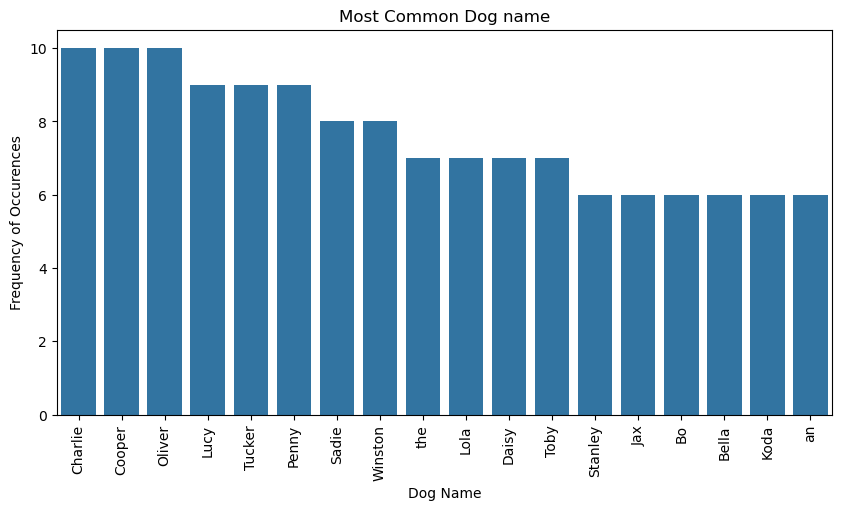

In [64]:
base_color = sns.color_palette()[0]
plt.figure(figsize = [10, 5])

sns.countplot(data = twitter_archive_master, x = 'name', color = base_color, order = dog_name) 

plt.title('Most Common Dog name')
plt.xlabel('Dog Name')
plt.ylabel('Frequency of Occurences');
plt.xticks(rotation = 90);

As can be see on the barchart above "Charlie" is the most common name for dogs in the dataset

#### Insight 2. How does the most like images affects the number of retweets

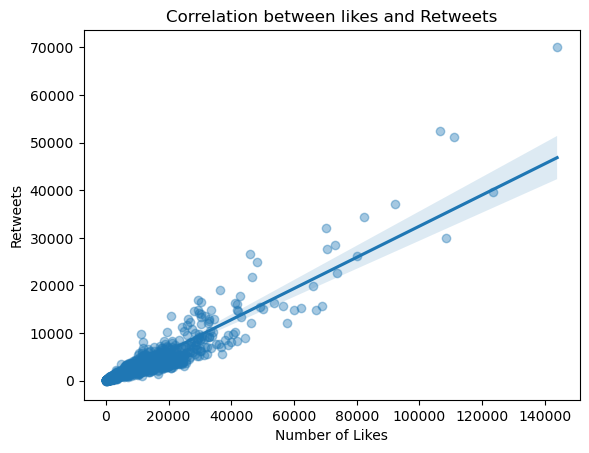

In [71]:
sns.regplot(data = twitter_archive_master, x = 'favorite_count', y = 'retweet_count', scatter_kws={'alpha':0.4})
plt.xlabel('Number of Likes')
plt.ylabel('Retweets');
plt.title('Correlation between likes and Retweets');


In [72]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.9284247914354896

As can be seen on the scatter plot above. There is a strong positive correlation between the number of likes a dog image accumulate and the number of times the image was retweeted. Therefore the relationship can be said to be linear. 

#### Insight 3. The  percentage of dogs in the dog stage

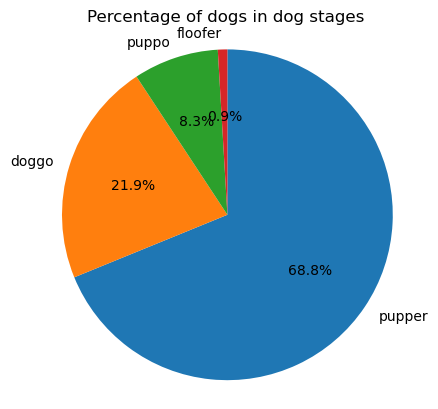

In [81]:
# plotting a pie chart of the dog stages
dog_stages = twitter_archive_master.dog_stage.value_counts()

plt.pie(dog_stages, labels = dog_stages.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.title('Percentage of dogs in dog stages');
plt.axis('square');

Majority of the dogs are in the Pupper stage(68.4%)

In [82]:
twitter_archive_master.name.value_counts()[:10]

None       545
a           55
Charlie     10
Cooper      10
Oliver      10
Lucy         9
Tucker       9
Penny        9
Sadie        8
Winston      8
Name: name, dtype: int64